# Continuous classification

## Basic imports

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn.datasets

## Import datasets

In [33]:
boston_prices = sklearn.datasets.load_boston()
print boston_prices.keys()
print boston_prices.data.shape
print boston_prices.feature_names
print boston_prices.target.shape

['data', 'feature_names', 'DESCR', 'target']


## Split data

In [35]:
X_train, X_test, y_train,y_test = train_test_split(boston_prices.data, boston_prices.target, test_size = 0.25)

## Make, train and predict model

In [36]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_predict = reg.predict(X_test)

## Normal score vs cross-validated score

In [37]:
print 'score : ' + str(reg.score(X_test, y_test))
cv_scores=  cross_val_score(reg, X_train, y_train, cv=5)
print np.mean(cv_scores)

score : 0.713561300117
0.699814904089


## Using Ridge instead of LR

score : 0.709690350039


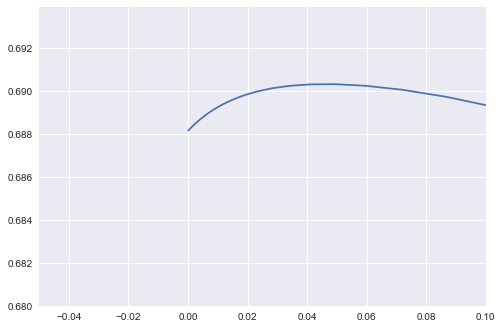

In [73]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns


ridge = Ridge(alpha = 0.04, normalize = True)
ridge.fit(X_train,y_train)
y_predict = ridge.predict(X_test)
print 'score : ' + str(ridge.score(X_test, y_test))


alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X_train, y_train, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))
    
plt.plot(alpha_space, ridge_scores)
plt.xlim(xmax = 0.1)
plt.ylim(ymin = 0.68)
plt.show()


## Using Lasso instead of LR

score : 0.683552452925
0.68876452042


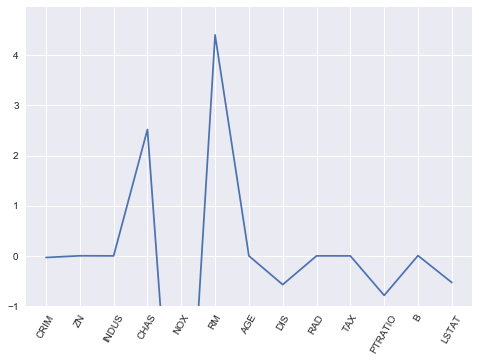

In [66]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha = 0.01, normalize = True)
lasso_coef = lasso.fit(X_train,y_train).coef_
y_predict = lasso.predict(X_test)

print 'score : ' + str(lasso.score(X_test, y_test))
cv_scores=  cross_val_score(lasso, X_train, y_train, cv=5)
print np.mean(cv_scores)

names = boston_prices.feature_names
_ = plt.plot(range(len(names)),lasso_coef)
_ = plt.xticks(range(len(names)),names, rotation = 60)
_ = plt.ylim(ymin=-1)
plt.show()

## Hyperparameter tuning

In [75]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.644404642083
Tuned ElasticNet MSE: 36.3352235553
